<img alt="Youtube" align="left" hspace="200"  height= "200" width="250" src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZ2JwY2Nvajd0ZGo4bDVmZzl6b3p0MDgwYWpiam93cTMyMW5tcm4zNCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/13Nc3xlO1kGg3S/giphy.gif"  >
<img alt="comment"  hspace="-20" height= "200" width="250" src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExamM5cGtyYjRrZHF3ZXV0b3JrbWxvNGI0YWU4dXVtbm90bzFqb2VydSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9cw/hbwUaes8G8b17sPg9R/giphy.gif">



# Sentiment Anlysis based on the YouTube comments
  * find correlations between likes and comments
  * investigate distribution of negative and positive comments

In [ ]:
#Run this for mounting on yout Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install kaggle library for importing dataset

!pip install kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d datasnaek/youtube-new
! kaggle datasets download -d datasnaek/youtube

youtube-new.zip: Skipping, found more recently modified local copy (use --force to force download)
 98% 55.0M/55.9M [00:02<00:00, 26.7MB/s]
100% 55.9M/55.9M [00:02<00:00, 20.5MB/s]


In [ ]:
#Import patool library for unzipping the dataset

!pip install patool
import patoolib
patoolib.extract_archive('youtube-new.zip')
patoolib.extract_archive('youtube.zip')

### lets import all the necessary packages !

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
comments = pd.read_csv('youtube/UScomments.csv' , error_bad_lines=False)

In [ ]:
### above is a warning , u can ignore that ..

In [ ]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
## lets find out missing values in your data
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [ ]:
## drop missing values as we have very few & lets update dataframe as well..
comments.dropna(inplace=True)

In [ ]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 2.. Perform Sentiment Analysis
    
    In short , Sentiment analysis is all about analyszing sentiments of Users

In [ ]:
!pip install textblob
### lets perform sentiment analysis using TextBlob which is a NLP library built on top of NLTK )..

In [ ]:
## if you are getting error in textblob while installing using pip ..
## you can install textblob using conda in Anazonda prompt

## conda install -c conda-forge textblob

In [ ]:
from textblob import TextBlob

In [ ]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [ ]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

### its a neutral sentence !

0.0

In [ ]:
comments.shape

(691375, 4)

In [ ]:
## for those of you who dont have good specifications , considering sample of data is a good option !

sample_df = comments[0:1000]

In [ ]:
sample_df.shape

(1000, 4)

In [ ]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [ ]:
len(polarity)

691375

In [ ]:
comments['polarity']  = polarity

### Inserting polarity values into comments dataframe while defining feature name as "polarity"

In [ ]:
comments.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## 3..  Wordcloud Analysis of your data

In [ ]:
### Lets perform EDA for the highly Positve sentences ie Polarity value will be 1

In [ ]:
filter1 = comments['polarity']==1

In [ ]:
comments_positive = comments[filter1]

In [ ]:
filter2 = comments['polarity']==-1

In [ ]:
comments_negative = comments[filter2]

In [ ]:
comments_positive.head(5)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud , STOPWORDS

In [ ]:
set(STOPWORDS)

In [ ]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [ ]:
type(comments['comment_text'])

pandas.core.series.Series

In [ ]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [ ]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

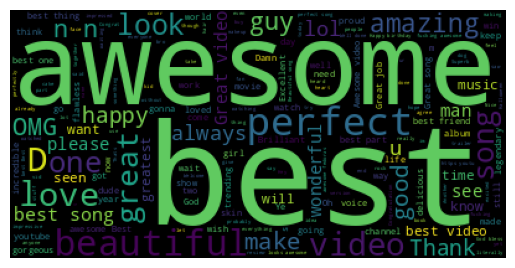

In [ ]:
plt.imshow(wordcloud)
plt.axis('off')

### Conclusion: positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc..

In [ ]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [ ]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

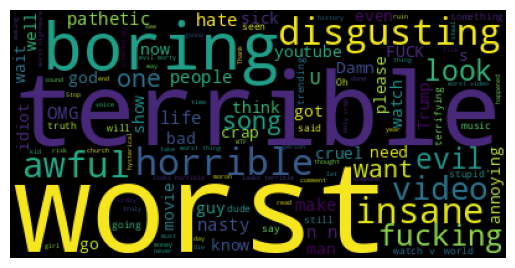

In [ ]:
plt.imshow(wordcloud2)
plt.axis('off')

### Conclusion: Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

## Create a wordcloud of tags

In [ ]:
V_tag = pd.read_csv('youtube-new/USvideos.csv', error_bad_lines=False)
V_tag.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
tags_complete = (' '.join(V_tag['tags']))

In [ ]:
import re
tags = re.sub('[^a-zA-Z]', ' ', tags_complete)
tags = re.sub(' +', ' ', tags)

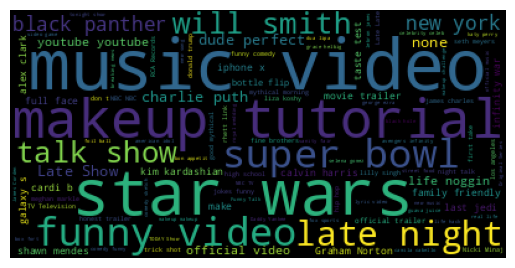

In [ ]:
wordcloud_tg = WordCloud(stopwords=set(STOPWORDS)).generate(tags)
plt.axis('off')
plt.imshow(wordcloud_tg)

## 4.. Perform Emoji's Analysis

In [ ]:
!pip install emoji  ## 2.2.0 is a most stable version till date , hence installing this version makes sense !

In [ ]:
import emoji

In [ ]:
emoji.__version__

'2.8.0'

In [ ]:
comments['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [ ]:
### lets extract emoji from below comment

In [ ]:
comment = 'trending 😉'

In [ ]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [ ]:
## lets try to write above code in a more simpler & readable way :

In [ ]:
emoji_list = []

for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

In [ ]:
emoji_list

['😉']

In [ ]:
all_emojis_list = []

for comment in comments['comment_text'].dropna(): ## in case u have missing values , call dropna()
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [ ]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

### Now we have to compute frequencies of each & every emoji in "all_emojis_list"..

In [ ]:
from collections import Counter

In [ ]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [ ]:
Counter(all_emojis_list).most_common(10)[0]

('😂', 36987)

In [ ]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [ ]:
Counter(all_emojis_list).most_common(10)[1][0]

'😍'

In [ ]:
Counter(all_emojis_list).most_common(10)[2][0]

'❤'

In [ ]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [ ]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [ ]:
Counter(all_emojis_list).most_common(10)[1][1]

33453

In [ ]:
Counter(all_emojis_list).most_common(10)[2][1]

31119

In [ ]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [ ]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
trace = go.Bar(x=emojis , y=freqs)

In [ ]:
iplot([trace])

## Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..

## 5.. Collect Entire data of Youtube !

In [ ]:
import os

In [ ]:
files= os.listdir('youtube-new')

In [ ]:
files

['GB_category_id.json',
 'INvideos.csv',
 'FR_category_id.json',
 'DE_category_id.json',
 'MXvideos.csv',
 'GBvideos.csv',
 'RU_category_id.json',
 'MX_category_id.json',
 'RUvideos.csv',
 'JPvideos.csv',
 'CA_category_id.json',
 'USvideos.csv',
 'JP_category_id.json',
 'CAvideos.csv',
 'IN_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'DEvideos.csv',
 'US_category_id.json',
 'FRvideos.csv']

In [ ]:
## extracting csv files only from above list ..

files_csv = [file for file in files if '.csv' in file]

In [ ]:
files_csv

['INvideos.csv',
 'MXvideos.csv',
 'GBvideos.csv',
 'RUvideos.csv',
 'JPvideos.csv',
 'USvideos.csv',
 'CAvideos.csv',
 'KRvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv']

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### different types of encoding-->>
    Note : encoding may change depending upon data  , country data , sometimes regional data as well.
    Fore more inforation on Encoding -- Follow below
### https://docs.python.org/3/library/codecs.html#standard-encodings¶

In [ ]:
full_df = pd.DataFrame()
path = 'youtube-new'


for file in files_csv:
    current_df = pd.read_csv(path+'/'+file , encoding='iso-8859-1' , error_bad_lines=False)

    full_df = pd.concat([full_df , current_df] , ignore_index=True)

In [ ]:
full_df.shape

(375942, 16)

## 6.. How to export your data into (csv, json, db)

### upto some extent your data is cleaned , so lets export this data into various formats for further analysis :

In [ ]:
#   export your data into :
#     a) csv
#     b) json
#     c) db

In [ ]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [ ]:
'''
default value of keep='first'

It means that the method will consider the first instance of a row to be unique and the remaining instances to be duplicates.


keep='first' (default): mark all rows as duplicates except for the first occurrence.

keep='last': mark all rows as duplicates except for the last occurrence.

keep=False: mark all rows as all duplicates.


'''

In [ ]:
full_df = full_df.drop_duplicates() ## lets drop duplicate rows ..

In [ ]:
full_df.shape

(339525, 16)

#### a... Storing data into csv ..

In [ ]:
### you can consider sample of data depending on how efficient your system is..

full_df[0:1000].to_csv('youtube_sample.csv' , index=False)

#### b... Storing data into json

In [ ]:
full_df[0:1000].to_json('youtube_sample.json')

#### c... Storing data into database

In [ ]:
#create engine allows us to connect to database
from sqlalchemy import create_engine

In [ ]:
# Lets create sql_alchemy engine by using create_engine method ie create engine allows us to connect to database
engine = create_engine('sqlite:///youtube_sample.sqlite')

In [ ]:
### we will store first 1000 rows into Users table..
full_df[0:1000].to_sql('Users' , con=engine , if_exists='append')

1000

### As soon as u have u have your data into 'youtube_sample.sqlite' which has table has 'Users', now u can read data from this db file 'youtube_whole_data.sqlite' using sqlite3 & pandas

## 7.. Which Category has the maximum likes ?

In [ ]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯|""à¤ª...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [ ]:
full_df['category_id'].unique()

array([ 1, 25, 24, 23, 10, 22, 19, 28, 27, 26, 43, 17, 29,  2, 15, 20, 30,
       44])

In [ ]:
## lets read json file ..
json_df = pd.read_json('youtube-new/US_category_id.json')

In [ ]:
json_df.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [ ]:
json_df['items'][0]

### each row of 'Items' feature is dictionary ..

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [ ]:
json_df['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [ ]:
cat_dict = {}

for item in json_df['items'].values:
    ## cat_dict[key] = value (Syntax to insert key:value in dictionary)
    cat_dict[int(item['id'])] = item['snippet']['title']

In [ ]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [ ]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [ ]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,Film & Animation
1,zUZ1z7FwLc8,17.14.11,"à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯|""à¤ª...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...",News & Politics
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Entertainment
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,Comedy


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Film & Animation'),
  Text(1, 0, 'News & Politics'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'People & Blogs'),
  Text(6, 0, 'Travel & Events'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Education'),
  Text(9, 0, 'Howto & Style'),
  Text(10, 0, 'Shows'),
  Text(11, 0, 'Sports'),
  Text(12, 0, 'Nonprofits & Activism'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Pets & Animals'),
  Text(15, 0, 'Gaming'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

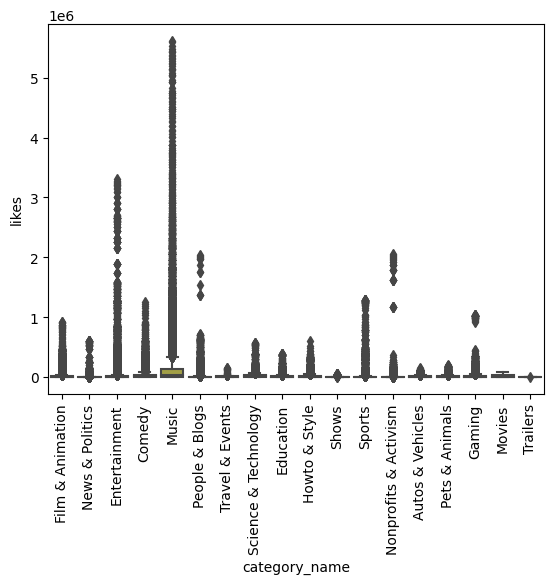

In [ ]:
#plt.figure(figsize=(12,8))
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')

## 8.. Find out whether audience is engaged or not

In [ ]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [ ]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

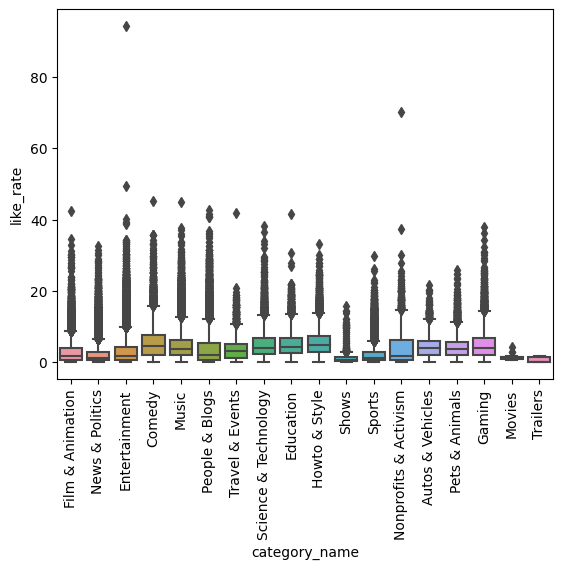

In [ ]:
#plt.figure(figsize=(8,6))
sns.boxplot(x='category_name' , y='like_rate' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

### analysing relationship between views & likes

<Axes: xlabel='views', ylabel='likes'>

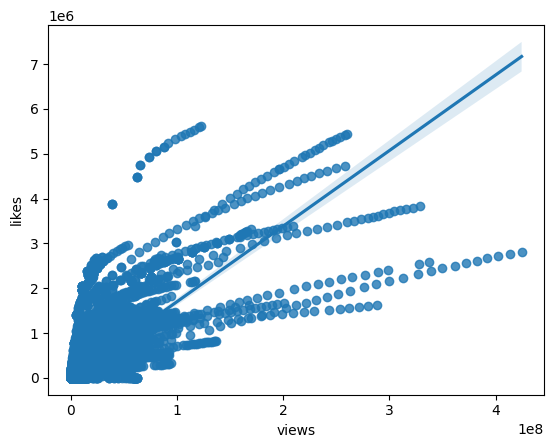

In [ ]:
sns.regplot(x='views' , y='likes' , data = full_df)

In [ ]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [ ]:
full_df[['views', 'likes', 'dislikes']].corr() ### finding co-relation values between ['views', 'likes', 'dislikes']

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

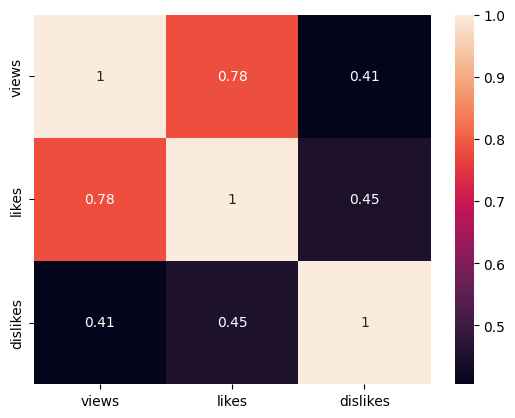

In [ ]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr() , annot=True)

## 9.. Which channels have the largest number of trending videos?

In [ ]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,Film & Animation,3.098163,0.072789,0.080450
1,zUZ1z7FwLc8,17.14.11,"à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯|""à¤ª...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...",News & Politics,0.124555,0.153194,0.000000
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Entertainment,0.424272,0.051267,0.031435
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,Comedy,5.661393,0.130685,0.215985
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,Entertainment,0.106031,0.063145,0.014224


In [ ]:
full_df['channel_title'].value_counts()

The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Anapat K.Wong                           1
NottinTV                                1
æ¥åãã¤ã­ã£ã¹ãã¬ã¸ã³       1
dwangker                                1
BoumÃ©-Sama                             1
Name: channel_title, Length: 37824, dtype: int64

### lets obtain above frequency table using groupby approach :

In [ ]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [ ]:
cdf = cdf.rename(columns={0:'total_videos'})

In [ ]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [ ]:
import plotly.express as px

In [ ]:
px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos')

## 10.. Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

In [ ]:
full_df['title'][0]

'Sharry Mann: Cute Munda ( Song Teaser) | Parmish Verma | Releasing on 17 November'

In [ ]:
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
len([char for char in full_df['title'][0] if char in string.punctuation])

5

In [ ]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [ ]:
sample = full_df[0:10000]

In [ ]:
sample['count_punc'] = sample['title'].apply(punc_count)

In [ ]:
sample['count_punc']

0        5
1        2
2        2
3        1
4        2
        ..
10042    1
10043    6
10044    5
10045    3
10046    2
Name: count_punc, Length: 10000, dtype: int64

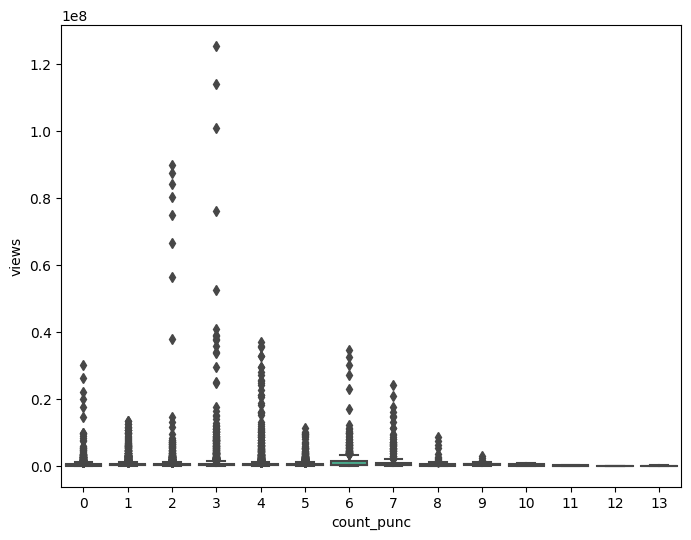

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='views' , data=sample)
plt.show()

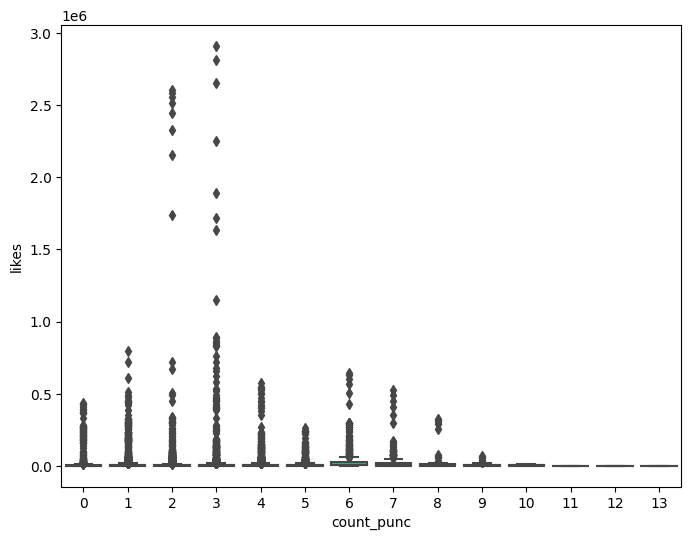

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='likes' , data=sample)
plt.show()

# The End